In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx
from scipy.stats import pearsonr

# machine lerning
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

# Budget Importance Analysis

In [18]:
#Load data
df = pd.read_csv('../Data/preprocessed_data/final_data/full_db.csv')

columns_to_keep = ['name', 'avg_budget_0','std_budget_0','avg_budget_1','std_budget_1','avg_budget_2','std_budget_2','success']
df = df[columns_to_keep]
full_df = df.rename(columns={'name': 'Name'})
full_df.sort_values(by=['success'], ascending=False)



,Name,avg_budget_0,std_budget_0,avg_budget_1,std_budget_1,avg_budget_2,std_budget_2,success
5185,Nicolas Cage,1.895170e+07,1.372983e+07,4.955597e+07,2.963674e+07,3.677003e+07,4.419293e+07,2.252450
2135,Leonardo DiCaprio,4.033317e+07,4.027526e+07,5.111410e+07,4.101362e+07,NaN,NaN,2.165815
5186,Tom Hanks,2.095120e+07,1.317438e+07,3.834273e+07,3.528570e+07,3.065853e+07,3.480187e+07,2.093282
6126,Gary Oldman,2.250652e+07,1.168132e+07,5.739779e+07,4.955617e+07,4.705855e+07,5.003266e+07,2.063533
2168,Scarlett Johansson,3.495454e+07,2.598018e+07,8.716231e+07,8.679505e+07,NaN,NaN,2.043450
...,...,...,...,...,...,...,...,...
2129,Ahney Her,7.100000e+07,1.041945e+08,NaN,NaN,NaN,NaN,0.311359
2131,Tara Macken,6.518333e+07,9.184045e+07,NaN,NaN,NaN,NaN,0.293505
2132,Harry Holland,7.500000e+07,7.305820e+07,NaN,NaN,NaN,NaN,0.244641
2133,Dale Pavinski,6.766667e+07,5.845986e+07,NaN,NaN,NaN,NaN,0.193497


In [21]:
beginning = full_df[['success', 'avg_budget_0', 'std_budget_0']].dropna() # Actors who had a beginning career (No NaN in avg_role_0)
middle = full_df[~full_df['avg_budget_1'].isna()][['success','avg_budget_0', 'std_budget_0', 'avg_budget_1', 'std_budget_1']].dropna() # Actors who had a mid career (No NaN in avg_role_1)
end = full_df[~full_df['avg_budget_2'].isna()][['success','avg_budget_0', 'std_budget_0','avg_budget_1', 'std_budget_1', 'avg_budget_2', 'std_budget_2']].dropna() # Actors who had a end career (No NaN in avg_role_2)

avg_budget_beginning = beginning['avg_budget_0']
avg_budget_mid = middle['avg_budget_1']
avg_budget_end = end['avg_budget_2']

std_budget_beginning = beginning['std_budget_0']
std_budget_mid = middle['std_budget_1']
std_budget_end = end['std_budget_2']

success_beginning = beginning['success'] 
success_mid = middle['success'] 
success_end = end['success']

assert len(avg_budget_beginning) == len(std_budget_beginning) == len(success_beginning)
assert len(avg_budget_mid) == len(std_budget_mid) == len(success_mid)
assert len(avg_budget_end) == len(std_budget_end) == len(success_end)


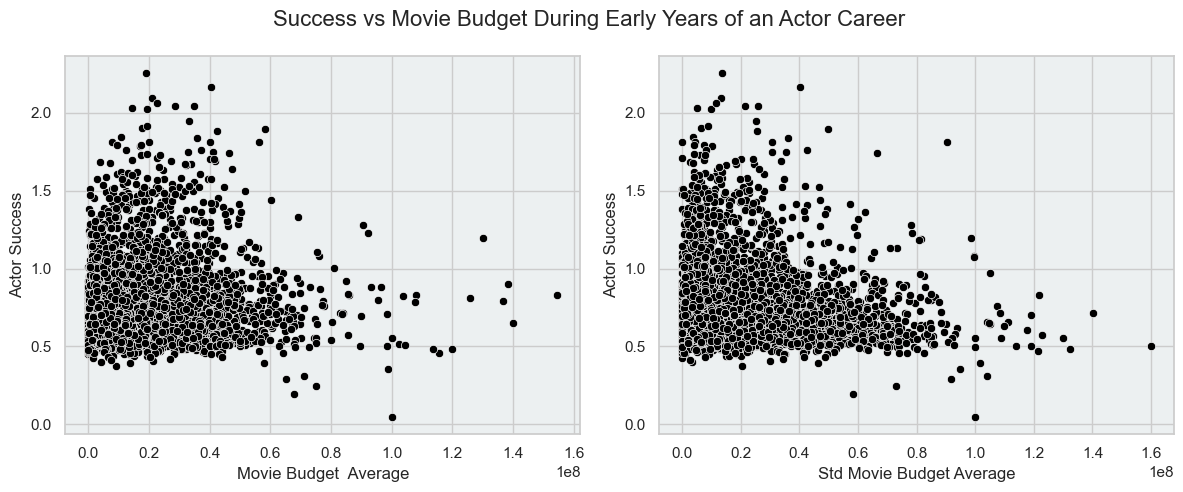

In [22]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Movie Budget During Early Years of an Actor Career ', fontsize=16)
# Flatten the 3 by 2 array of subplots into a 1D array for easier indexing
axes = axes.flatten()
sns.set_theme()
light_blue = '#ECF0F1'
light_green = '#D5F5E3'
light_yellow = '#FFFFE0'
# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Success vs Role Average
sns.scatterplot(x=avg_budget_beginning, y=success_beginning, ax=axes[0],  color='black')
axes[0].set_xlabel('Movie Budget  Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_blue)


# Plot 2: Success vs budget Standard Deviation
sns.scatterplot(x=std_budget_beginning, y=success_beginning, ax=axes[1], color='black')
axes[1].set_xlabel('Std Movie Budget Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_blue)


plt.tight_layout()
plt.show()

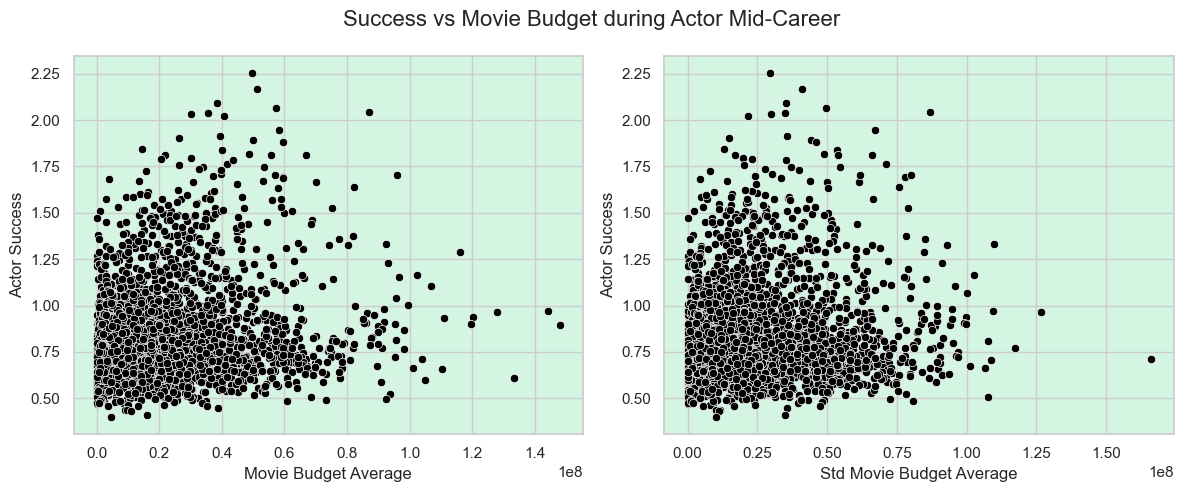

In [23]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Movie Budget during Actor Mid-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

# Plot 1: Success vs budget Average
sns.scatterplot(x=avg_budget_mid, y=success_mid, ax=axes[0], color='black')
axes[0].set_xlabel('Movie Budget Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_green)

# Plot 2: Success vs budget Standard Deviation
sns.scatterplot(x=std_budget_mid, y=success_mid, ax=axes[1], color='black')
axes[1].set_xlabel('Std Movie Budget Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_green)

plt.tight_layout()
plt.show()


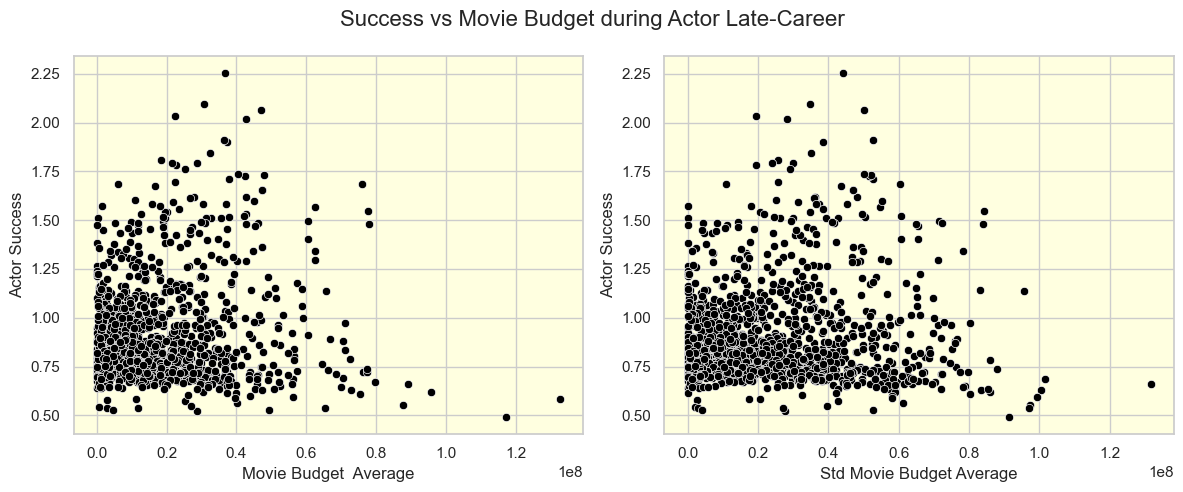

In [24]:

fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Movie Budget during Actor Late-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

sns.scatterplot(x=avg_budget_end, y=success_end, ax=axes[0], color='black')
axes[0].set_xlabel('Movie Budget  Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_yellow)

# Plot 2: Success vs budget Standard Deviation
sns.scatterplot(x=std_budget_end, y=success_end, ax=axes[1], color='black')
axes[1].set_xlabel('Std Movie Budget Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_yellow)



plt.tight_layout()
plt.show()

## Hypothesis testing: Pearson Correlation

p-value average: [2.25634242e-27 4.18771004e-56 2.01966609e-10]
p-value standard deviation: [1.32618968e-08 3.45566780e-29 1.36781473e-06]


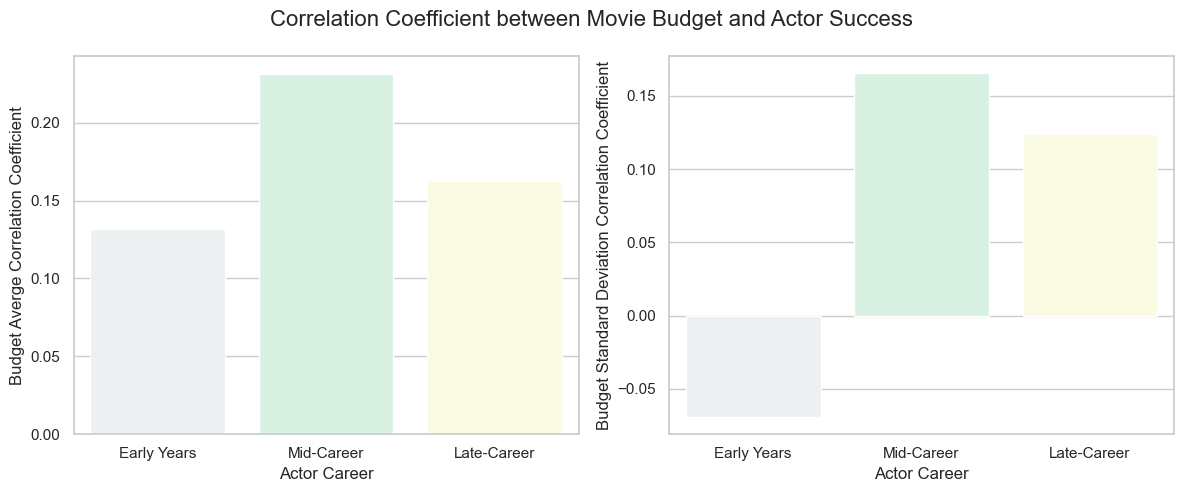

In [25]:
# budget importance Averages
cc_av=np.zeros(3)
p_av=np.zeros(3)
cc_av[0], p_av[0] = pearsonr(avg_budget_beginning, success_beginning) # Early Years
cc_av[1], p_av[1] = pearsonr(avg_budget_mid, success_mid) # Mid-Career
cc_av[2], p_av[2] = pearsonr(avg_budget_end, success_end) # Late-Career 

# budget Importance Standard deviation
cc_std=np.zeros(3)# Correlation Coefficient
p_std=np.zeros(3) # Pvalue
cc_std[0], p_std[0] = pearsonr(std_budget_beginning, success_beginning) # Early Years
cc_std[1], p_std[1] = pearsonr(std_budget_mid, success_mid) # Mid-Career
cc_std[2], p_std[2] = pearsonr(std_budget_end, success_end) # Late-Career 

print("p-value average:", p_av)
print("p-value standard deviation:", p_std)

# Plotting the correlation coefficient
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Correlation Coefficient between Movie Budget and Actor Success', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

# Plot 1: Success vs budget Average

palette = sns.color_palette("light:#5A9")
palette = [light_blue, light_green, light_yellow]

sns.barplot(x=['Early Years', 'Mid-Career', 'Late-Career'], y=cc_av, ax=axes[0], palette=palette)

axes[0].set_xlabel('Actor Career')
axes[0].set_ylabel('Budget Averge Correlation Coefficient')

# Plot 2: Success vs budget Standard Deviation
sns.barplot(x=['Early Years', 'Mid-Career', 'Late-Career'], y=cc_std, ax=axes[1], palette=palette)
axes[1].set_xlabel('Actor Career')
axes[1].set_ylabel('Budget Standard Deviation Correlation Coefficient')

plt.tight_layout()
plt.show()


## Regression Analysis: Gradient Boosting Regression

In [26]:
def numpy_helper(df, cols):
    new_array = df[cols].values.astype(float)
    return new_array

In [27]:
# instead of accuracy, precision and recall (more used for classification), use MSE (Mean Square Error) and R-squared

# average 
# X_1 stack actor1[common features, avg_0] , actor 2[common features, avg_0], actor 3[common features, avg_0]
# X_2 stack actor1[common features group 2, avg_1.dropna] , actor 2[common features, avg_1.dropna], actor 3[common features_group2, avg1.dropna]

def predict(career, df, test_feature, target='success'):

    features = df.columns.tolist()
    features.remove(target)
    features.remove(test_feature)

    # Model 1 without test_feature
    X = numpy_helper(df, features)
    y = numpy_helper(df, target)
    model1 = GradientBoostingRegressor()
    results_model1 = cross_validate(model1, X, y, cv=3, scoring=('r2', 'neg_mean_squared_error'))

    print("The prediction results without the ", test_feature, " for the ", career, " are: ")
    
    print("R2",results_model1['test_r2'].mean())
    print("Negative Mean Square", results_model1['test_neg_mean_squared_error'].mean())
    print()
    # Model 2 with test_feature
    X = numpy_helper(df, features + [test_feature])
    y = numpy_helper(df, target)
    model2 = GradientBoostingRegressor()
    results_model2 = cross_validate(model2, X, y, cv=3, scoring=('r2', 'neg_mean_squared_error'))

    print("The prediction results with the ", test_feature, " for the ", career, " are: ")
    print("R2",results_model2['test_r2'].mean())
    print("Negative Mean Square", results_model2['test_neg_mean_squared_error'].mean())
    print('------------------------------------------------------')

#Early years- average role
predict('Early Years', beginning, 'avg_budget_0')

#Early years- std role
predict('Early Years', beginning, 'std_budget_0')

#Mid-Career- avg role
predict('Mid-Career', middle, 'avg_budget_1')

#Mid-Career- std role
predict('Mid-Career', middle, 'std_budget_1')

#Late-Career- avg role
predict('Late-Career', end, 'avg_budget_2')

#Late-Career- std role
predict('Late-Career', end, 'std_budget_2')

The prediction results without the  avg_budget_0  for the  Early Years  are: 
R2 -0.6052723278522044
Negative Mean Square -0.06028109409122825

The prediction results with the  avg_budget_0  for the  Early Years  are: 
R2 -0.3756538172348851
Negative Mean Square -0.050940161450115866
------------------------------------------------------
The prediction results without the  std_budget_0  for the  Early Years  are: 
R2 -0.3968545703530679
Negative Mean Square -0.053645582987821266

The prediction results with the  std_budget_0  for the  Early Years  are: 
R2 -0.3787838404497701
Negative Mean Square -0.05106275079685297
------------------------------------------------------
The prediction results without the  avg_budget_1  for the  Mid-Career  are: 
R2 -1.9927651394155006
Negative Mean Square -0.06552275622711445

The prediction results with the  avg_budget_1  for the  Mid-Career  are: 
R2 -1.8823342117253334
Negative Mean Square -0.06431014650445022
--------------------------------------